# Routine Correlation ARGO X BUOY 

Daniela Leite Corrêa


In [1]:
from pydap.client import open_url
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import datetime
from argopy import DataFetcher as ArgoDataFetcher
from argopy import IndexFetcher as ArgoIndexFetcher
from datetime import datetime

from pandas.core.index import MultiIndex
argo_loader = ArgoDataFetcher()

from datetime import date

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import datetime
import xarray as xr
from netCDF4 import Dataset , num2date
import os 
from cdo import * 
from scipy.io import netcdf_file as netcdf
import matplotlib.pyplot as plt
import cmocean
import plotly.graph_objects as go



C:\Users\Daniela\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text))
C:\Users\Daniela\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  if __name__ == '__main__':


In [2]:
#buoy = xr.open_dataset('http://goosbrasil.org:8080/pirata/B0n23w.nc')
buoy = xr.open_dataset('http://goosbrasil.org:8080/pirata/B0n10w.nc')
#buoy = xr.open_dataset('http://goosbrasil.org:8080/pirata/B8n38w.nc')
#buoy = xr.open_dataset('http://goosbrasil.org:8080/pirata/B8s30w.nc')


buoy

<xarray.Dataset>
Dimensions:        (depth_s: 8, depth_t: 15, time: 8855)
Coordinates:
  * depth_s        (depth_s) float32 1.0 5.0 10.0 20.0 40.0 60.0 80.0 120.0
  * depth_t        (depth_t) float32 1.0 5.0 10.0 13.0 ... 180.0 300.0 500.0
  * time           (time) datetime64[ns] 1997-09-14T12:00:00 ... 2021-12-11T1...
Data variables:
    rad            (time) float32 ...
    salinity_q     (time, depth_s) float32 ...
    rh_q           (time) float32 ...
    salinity_s     (time, depth_s) float32 ...
    qsen_q         (time) float32 ...
    rh_s           (time) float32 ...
    rain_percent   (time) float32 ...
    bp_s           (time) float32 ...
    bp_q           (time) float32 ...
    temperature    (time, depth_t) float32 ...
    rad_s          (time) float32 ...
    lw             (time) float32 ...
    airt           (time) float32 ...
    rain_s         (time) float32 ...
    latitude       (time) float32 ...
    rain_q         (time) float32 ...
    rh             (time) float32 ...
    temperature_s  (time, depth_t) float32 ...
    rain_std       (time) float32 ...
    ws_s           (time) float32 ...
    lon_q          (time) float32 ...
    wd             (time) float32 ...
    qlat_q         (time) float32 ...
    ws_q           (time) float32 ...
    rain           (time) float32 ...
    rad_peak       (time) float32 ...
    bp             (time) float32 ...
    airt_s         (time) float32 ...
    airt_q         (time) float32 ...
    lat_q          (time) float32 ...
    qsen           (time) float32 ...
    rad_std        (time) float32 ...
    wd_q           (time) float32 ...
    wd_s           (time) float32 ...
    qlat           (time) float32 ...
    lw_s           (time) float32 ...
    lw_q           (time) float32 ...
    salinity_id    (time, depth_s) float32 ...
    rad_q          (time) float32 ...
    longitude      (time) float32 ...
    salinity       (time, depth_s) float32 ...
    ws             (time) float32 ...
    temperature_q  (time, depth_t) float32 ...
Attributes:
    comment:          These data were obtained from Pacific Marine Environmen...
    source:           Moored buoy from PIRATA
    history:          Created Tue Dec 14 12:08:47 2021
    description:      Buoy 0n10w
    missing_value:    -99999
    data_management:  SALT - Sea & Limno Technology
    institution:      GOOS-Brasil

In [3]:
temp = buoy.variables['temperature'][:]
time = buoy.variables['time'][:]
depth_t = buoy.variables['depth_t'][:]


# Argo

In [5]:
#fetcher = argo_loader.region([-23.5, -22.5, -0.5, 0.5, 0,500, '1999-3-7','2021-3-7']) #0n 23
#fetcher = argo_loader.region([-24, -22, -1, 1, 0,500, '1999-3-7','2021-3-7']) #0n 23


#fetcher = argo_loader.region([-10.5, -9.5,-0.5, 0.5, 0, 500, '1999-3-7','2021-3-7'])  #0n 10
fetcher = argo_loader.region([-11, -9,-1,1, 0, 500, '1999-3-7','2021-3-7'])  #0n 10

#fetcher = argo_loader.region([-38.5, -37.5,7.5, 8.5, 0, 500, '1999-3-7','2021-3-7']) #8n 38
#fetcher = argo_loader.region([-39, -37,7, 9, 0, 500, '1999-3-7','2021-3-7']) #8n 38
#fetcher = argo_loader.region([-40, -36,8, 10, 0, 500, '1999-3-7','2021-3-7']) #8n 38


#fetcher = argo_loader.region([-30.5, -29.5,-8.5, -7.5, 0, 500, '1999-3-7','2021-3-7']) #8s 30
#fetcher = argo_loader.region([-31, -29,-9, -7, 0, 500, '1999-3-7','2021-3-7']) #8s 30
#fetcher = argo_loader.region([-32.0, -28.0,-10, -6, 0, 500, '1999-3-7','2021-3-7']) #8s 30



#fetcher = argo_loader.region([8, 13,-20, -10, 0, 500, '2014-1-1','2021-3-7']) #8s 30


ds = fetcher.to_xarray()

In [6]:
ds_profiles = ds.argo.point2profile()
print(ds_profiles)

<xarray.Dataset>
Dimensions:                (N_LEVELS: 446, N_PROF: 305)
Coordinates:
  * N_PROF                 (N_PROF) int32 5 6 4 11 12 13 ... 130 131 132 85 133
  * N_LEVELS               (N_LEVELS) int32 0 1 2 3 4 5 ... 441 442 443 444 445
    LATITUDE               (N_PROF) float64 0.068 0.591 0.0 ... -0.5509 -0.1822
    LONGITUDE              (N_PROF) float64 -10.18 -10.98 ... -10.15 -10.45
    TIME                   (N_PROF) datetime64[ns] 2003-05-09T05:18:00 ... 20...
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int32 1 2 1 1 2 2 2 2 2 ... 2 5 5 4 4 4 5 5
    CYCLE_NUMBER           (N_PROF) int32 0 1 0 0 1 2 ... 122 123 124 256 141
    DATA_MODE              (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'R' 'D'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'D' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 1900207 1900207 ... 1901711 3901822
    POSITION_QC            (N_PROF) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES                 

In [7]:
temperatura = ds_profiles.variables['TEMP'][:]
pres = ds_profiles.variables['PRES'][:]
juld = ds_profiles.variables['TIME'][:]
psal = ds_profiles.variables['PSAL'][:]
lon = ds_profiles.variables['LONGITUDE'][:]
lat = ds_profiles.variables['LATITUDE'][:]
n_levels = ds_profiles.variables['N_LEVELS'][:]
ciclo = ds_profiles.variables['CYCLE_NUMBER'][:]
plataforma = ds_profiles.variables['PLATFORM_NUMBER'][:]
prei=np.arange(3,500,3)
direcao = ds_profiles.variables['DIRECTION']
N_PROF =ds_profiles.variables['N_PROF'][:]

In [8]:
temp = temp.where(temp>0)

In [9]:
depth_t

<xarray.IndexVariable 'depth_t' (depth_t: 15)>
array([  1.,   5.,  10.,  13.,  23.,  30.,  40.,  60.,  80., 100., 120., 140.,
       180., 300., 500.], dtype=float32)
Attributes:
    units:      m
    long_name:  depth

# Plot de boia x argo por profundidade

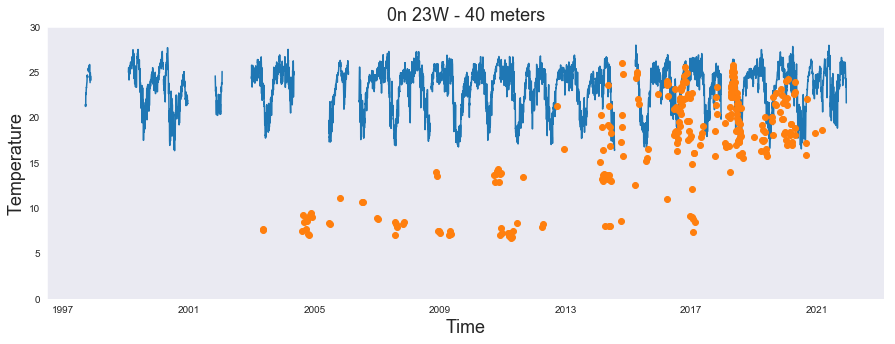

In [10]:
plt.rcParams["figure.figsize"] = (15,5)
fig, ax = plt.subplots()

plt.plot(time,temp[:,6],'-')  # 0 is the positision of depth 1m
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,30))

level = 0 #AQUI QUE ESCOLHE O NIVEL DOS GRAICOS 
#plt.plot(juld,temperatura[:,level:level+1], 'o') # 1 is the positision of depth 1m
plt.plot(juld,temperatura[:,40], 'o') # 1 is the positision of depth 1m

    
plt.title('0n 23W - 40 meters', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.show()

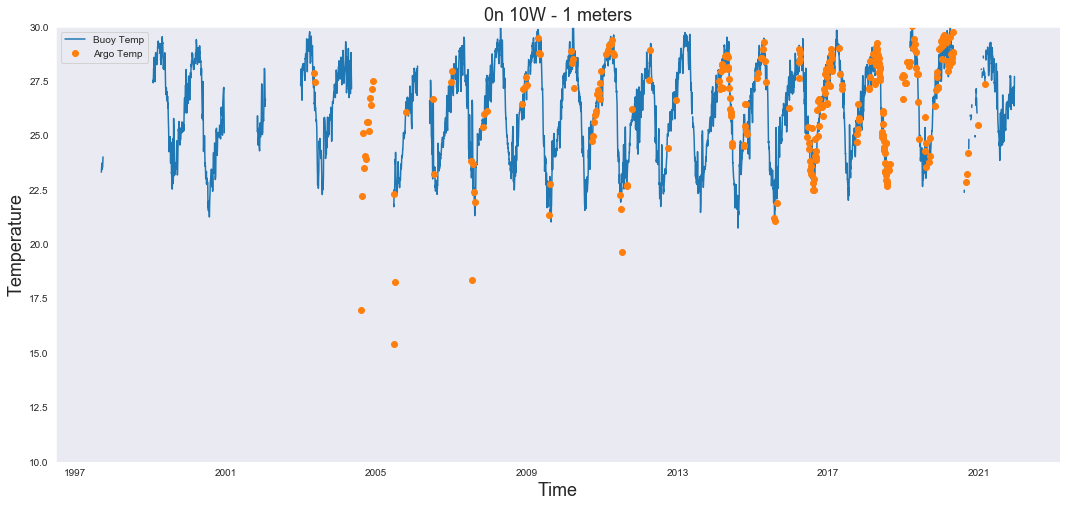

In [11]:
plt.rcParams["figure.figsize"] = (18,8)
fig, ax = plt.subplots()

#################################### Temperatures ARGO ####################################
level_argo = 0 # Enter level ARGO
plt.plot(time,temp[:,level_argo],'-', label = 'Buoy Temp')  # 0 is the positision of depth 1m
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,10,30))

######################################## Buoy temperature at each level ########################################
level_buoy = 1  # Enter level
plt.plot(juld,temperatura[:,level_buoy:level_buoy+1], 'o', label = 'Argo Temp') # 1 is the positision of depth 1m
    
plt.title('0n 10W - 1 meters', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.legend()
plt.show()

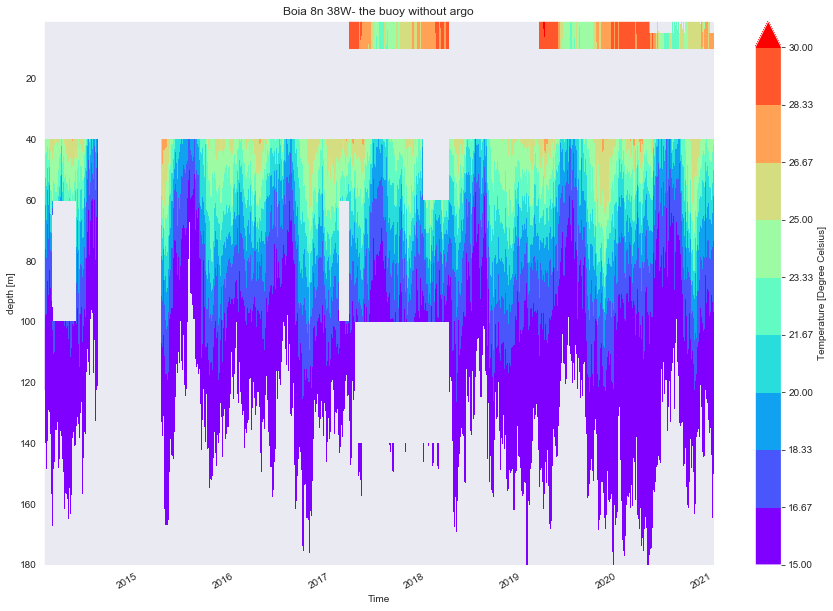

In [12]:
plt.figure(figsize=(15,10))
buoy = buoy.sel(time=slice('2014-1-1', '2021-1-1'),depth_t=slice(0,200))
#plt.style.use('ggplot')
levels = np.linspace(15, 30, 10)
cs = buoy.temperature.T.plot.contourf(cmap='rainbow', levels=levels, extend = "max",vmax=30, vmin=5)
#cs2 = buoy.temperature.T.plot.contour(colors=('w'), levels=cs.levels[::4])
# plt.gca().clabel(cs, fmt='%2.1f', colors='w', fontsize=10)
plt.title('Boia 8n 38W- the buoy without argo')
plt.gca().invert_yaxis()
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def MergeData(time,temp, level_argo, juld, temperatura, level_buoy):

    df = pd.DataFrame()
    df_full = pd.DataFrame()    
    time,temp[:,level_argo]

    # data incompleta ainda
    templeveln = temperatura[:,level_buoy:level_buoy+1].values
    juld[1] # tempo incompleto

    df['time'] = juld
    df['time'] = df['time'].dt.date
    df['tem1'] = templeveln

    df_full['time'] = time
    df_full['time'] = df_full['time'].dt.date
    df_full['tem2'] = temp[:,level]
    
    dfr = pd.merge(df, df_full, how="left", on=["time"])  #mescla dataframe da variavel tempo
    dfr = dfr[dfr.tem2.notna()]
    dfr = dfr.reset_index()
    return dfr

def TemperturePlot(x, y1, y2, title, label1, label2, option =False): #para correlação entre duas temperaturas
    with_, height_ = 16, 8
    fig, ax = plt.subplots(figsize=(with_, height_))
    ax.set_title(title)
    ax.set_xlabel(f'time')
    ax.set_ylabel(f'temperature')
    if option==False:
        plt.plot(x, y2,'*',color ='blue', label= label2, linewidth = 1)
        plt.plot(x, y1,'*',color ='red', label= label1, linewidth = 1)
        
    else:
        plt.plot(dfr.tem2,'*',color ='blue', label= "Argo Tem", linewidth = 1)
        plt.plot(dfr.tem1,'*',color ='red', label= "Buoy Tem", linewidth = 1)

        plt.plot(dfr.tem2,'-',color ='blue', linewidth = 1)
        plt.plot(dfr.tem1,'-',color ='red', linewidth = 1)
    plt.legend()
    
def CleanData(temp, level_argo): #para tirar os nan
    temp2 = temp[:,0]

    temp2Clean = temp2[~np.isnan(temp2)]

    temp2Clean = temp2Clean.values.reshape(-1, 1)

    return temp2Clean

def CompleteData(dfr, degree, temp2Clean): #completar os dados através de aproximacao polynomial a temperatura sem nan

    polyreg1 = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    
    polr = polyreg1.fit(dfr.tem2.values.reshape(-1, 1), dfr.tem1.values.reshape(-1, 1))
    
    BuoyCompData = (polr.predict(temp2Clean ))
    
    return BuoyCompData

def PlotTemp(cleant2, BuoyCompData):
    with_, height_ = 16, 8
    fig, ax = plt.subplots(figsize=(with_, height_))
    ax.set_title('T = Temperature comparison')
    ax.set_xlabel(f'time')
    ax.set_ylabel(f'temperature')

    plt.plot(cleant2,'o',color ='blue', label= "Argo data", linewidth = 1)
    plt.plot(BuoyCompData,'o',color ='red', label= "Buoy Data completed", linewidth = 1)
    plt.legend()
    

# Correlation, Interpolation and Contour between two temperatures

# Limpar os dados
Primeiro precisa limpar a data para obter somente os dias que ambas tem dados e depois poder calcular a correlaçã

In [14]:
def MergeData(time,temp, level_argo, juld, temperatura, level_buoy):

    df = pd.DataFrame()
    df_full = pd.DataFrame()    
    time,temp[:,level_argo]

    # data imcomplete
    templeveln = temperatura[:,level_buoy:level_buoy+1].values
    juld[1] # time incomplete

    df['time'] = juld
    df['time'] = df['time'].dt.date
    df['tem1'] = templeveln

    df_full['time'] = time
    df_full['time'] = df_full['time'].dt.date
    df_full['tem2'] = temp[:,level]
    
    dfr = pd.merge(df, df_full, how="left", on=["time"])
    dfr = dfr[dfr.tem2.notna()]
    dfr = dfr.reset_index()
    return dfr

level_argo = 1
level_buoy = 0
dfr = MergeData(time,temp, level_argo, juld, temperatura, level_buoy)
dfr
# temperatura[:, 3]
# temperatura[:,level_buoy:level_buoy+1].values

,index,time,tem1,tem2
0,0,2003-05-09,28.011000,27.280001
1,1,2003-05-19,27.461000,27.000000
2,16,2005-06-20,22.586000,21.730000
3,17,2005-06-30,21.513000,22.910000
4,18,2005-10-19,26.115999,26.389999
...,...,...,...,...
261,294,2020-04-10,28.587999,28.650000
262,295,2020-04-19,28.730000,28.520000
263,296,2020-04-19,28.375000,28.520000
264,297,2020-04-20,28.829000,28.809999


In [15]:
level_argo

1

# Plot boia x argo

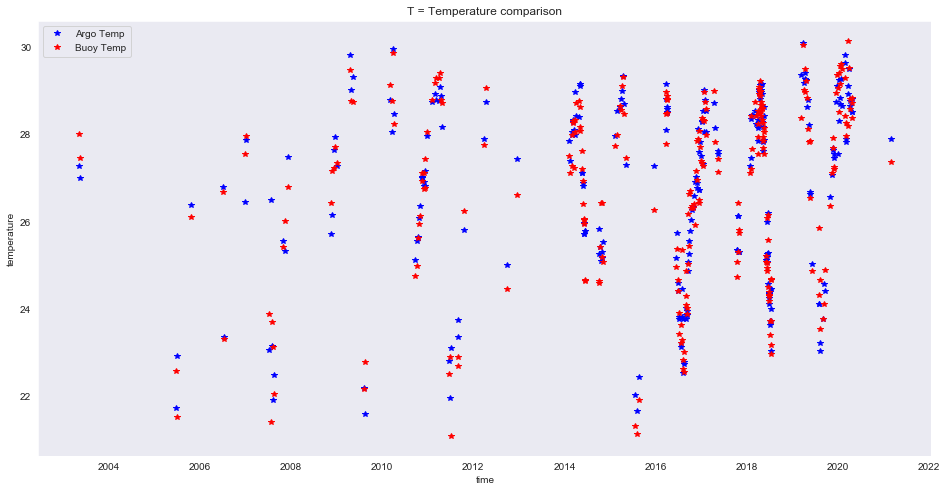

In [16]:
label1 = "Buoy Temp"
label2 = "Argo Temp"
TemperturePlot(dfr.time, dfr.tem1, dfr.tem2, 'T = Temperature comparison', label1, label2)
plt.show()

# Comparação das temperaturas
Somente os dias que ambas tem dados foram usados

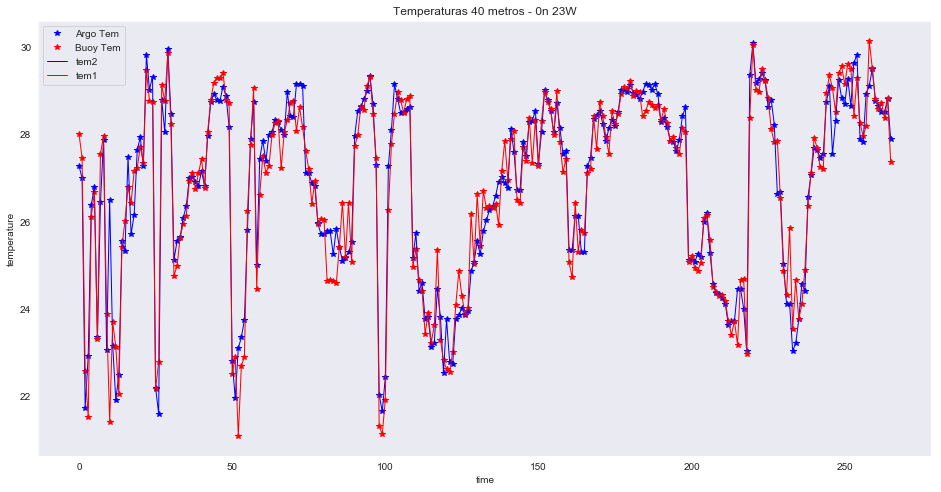

Correlation Coef:  0.9568592727603252


In [17]:
TemperturePlot(dfr.time, dfr.tem1, dfr.tem2, 'Temperaturas 40 metros - 0n 23W', label1, label2, option=True)
corr_mean = stats.spearmanr(dfr.tem1, dfr.tem2) #Ao contrário da correlação de Pearson, a correlação de Spearman não assume 
                                                #que ambos os conjuntos de dados são normalmente distribuídos.
plt.show()
print("Correlation Coef: ", corr_mean[0])

In [18]:
def CleanData(time, temp, level_argo):
    temp2 = temp[:,0]

    temp2Clean = temp2[~np.isnan(temp2)]
    time2Clean = time[~np.isnan(temp2)]
    temp2Clean = temp2Clean.values.reshape(-1, 1)

    return time2Clean, temp2Clean

def CompleteData(dfr, degree, temp2Clean):

    polyreg1 = make_pipeline(PolynomialFeatures(degree),LinearRegression())

    polr = polyreg1.fit(dfr.tem2.values.reshape(-1, 1), dfr.tem1.values.reshape(-1, 1))
    
    BuoyCompData = (polr.predict(temp2Clean )) #A função calcula o valor previsto com o intervalo de confiança
    
    return BuoyCompData


level_argo = 0
temp[:,level_argo]


time2clean, temp2Clean = CleanData(time, temp, level_argo)

print( len(time2clean), len(temp2Clean) )

degree = 3
BuoyCompData = CompleteData(dfr, degree, temp2Clean)

6686 6686


# Ver a correlação das temperaturas nas datas que coincidem

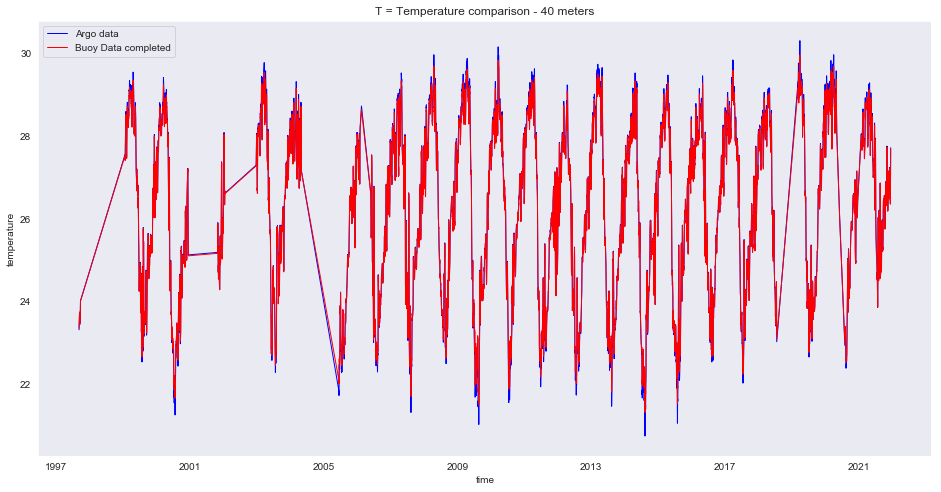

In [19]:
def PlotTemp(cleant2, BuoyCompData):
    with_, height_ = 16, 8
    fig, ax = plt.subplots(figsize=(with_, height_))
    ax.set_title('T = Temperature comparison - 40 meters')
    ax.set_xlabel(f'time')
    ax.set_ylabel(f'temperature')

    plt.plot(time2clean,cleant2,'-',color ='blue', label= "Argo data", linewidth = 1)
    plt.plot(time2clean,BuoyCompData,'-',color ='red', label= "Buoy Data completed", linewidth = 1)
    plt.legend()
    plt.show()

PlotTemp(temp2Clean, BuoyCompData)

# Preenche dados faltando
Preenche dados faltando da boia e do argo fazendo interpolação

In [20]:
def interp(time2clean, temp2Clean, BuoyCompData):
    BuoyCompData = BuoyCompData.reshape(-1)
    temp2Clean = temp2Clean.reshape(-1)
    df = pd.DataFrame({ 'time': time2clean, 'Buoy Temp': BuoyCompData ,'Argo Temp':temp2Clean})
    # df.time = df.time.dt.date
    df = df.set_index('time')

    df_interpol = df.resample('D')\
                    .mean()
    #df_interpol['Buoy Temp'] = df_interpol['Buoy Temp'].interpolate(method='polynomial',order=2) #se quiser interpolado 
    #df_interpol['Argo Temp'] = df_interpol['Argo Temp'].interpolate(method='polynomial',order=2)
    df_interpol['Buoy Temp'] = df_interpol['Buoy Temp']
    df_interpol['Argo Temp'] = df_interpol['Argo Temp']
    
    return df_interpol

df_interpol = interp(time2clean, temp2Clean, BuoyCompData)

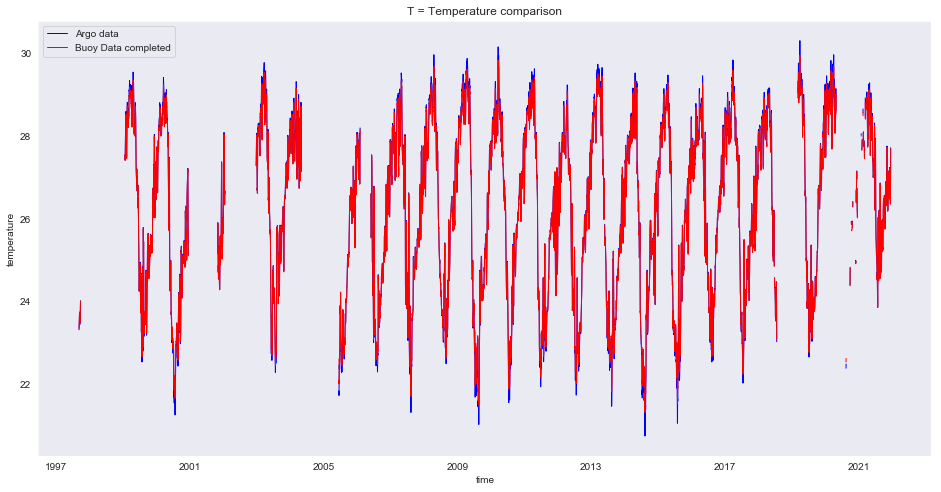

In [21]:
def PlotTemp(df_interpol):
    with_, height_ = 16, 8
    fig, ax = plt.subplots(figsize=(with_, height_))
    ax.set_title('T = Temperature comparison')
    ax.set_xlabel(f'time')
    ax.set_ylabel(f'temperature')

    plt.plot(df_interpol.index,df_interpol['Argo Temp'],'-',color ='blue', label= "Argo data", linewidth = 1)
    plt.plot(df_interpol.index,df_interpol['Buoy Temp'],'-',color ='red', label= "Buoy Data completed", linewidth = 1)
    plt.legend()
    plt.show()

PlotTemp(df_interpol)

# Dados da boia

In [22]:
temp = buoy.variables['temperature'][:]
time = buoy.variables['time'][:]
depth_t = buoy.variables['depth_t'][:]

# Interpolação dos dados 


In [23]:
T_array = np.zeros([depth_t.shape[0],time.shape[0] ])
T_array.shape

depth_array = np.empty([depth_t.shape[0]])
for n, level_buoy in enumerate(depth_t):  #interpola para os niveis da boia 
    
    depth_array[n] = int(level_buoy)
    
    t_act = temp[:,n]
    
   # t_act[t_act < -99.0] = None 
    t_act[t_act < 0] = None 

    if len(t_act)!=0: 
        df = pd.DataFrame({ 'time': time, 'temp1': t_act.values.reshape(-1)})
        df.time = df.time.dt.date
        df = df.set_index('time')
        df_interpol = df
        df_interpol['temp1'] = df_interpol['temp1'].interpolate(method='linear')
        new_row = df_interpol['temp1'].to_numpy()
        T_array[n,:] = new_row

In [24]:
T_array

array([[25.82999992, 25.87999916, 26.30999947, ..., 26.43000031,
        26.43000031, 26.43000031],
       [        nan,         nan,         nan, ..., 27.54000092,
        27.48999977, 27.28000069],
       [        nan,         nan,         nan, ..., 27.55999947,
        27.5       , 27.28000069],
       ...,
       [15.17000008, 14.75      , 14.69999981, ..., 15.43000031,
        15.30000019, 15.40999985],
       [14.43000031, 14.23999977, 14.26000023, ..., 15.15999985,
        15.03999996, 15.07999992],
       [13.86999989, 13.81000042, 13.77000046, ..., 14.46000004,
        14.39000034, 14.42000008]])

In [25]:
#def nan_helper(T_array):
#      return np.isnan(T_array), lambda z: z.nonzero()[0]  #FAZENDO INTEP LINEAR

In [26]:
#nans, x= nan_helper(T_array)
#T_array[nans]= np.interp(x(nans), x(~nans), T_array[~nans])

In [27]:
T_array.shape

(13, 2255)

# Boia sendo completada com dados do argo

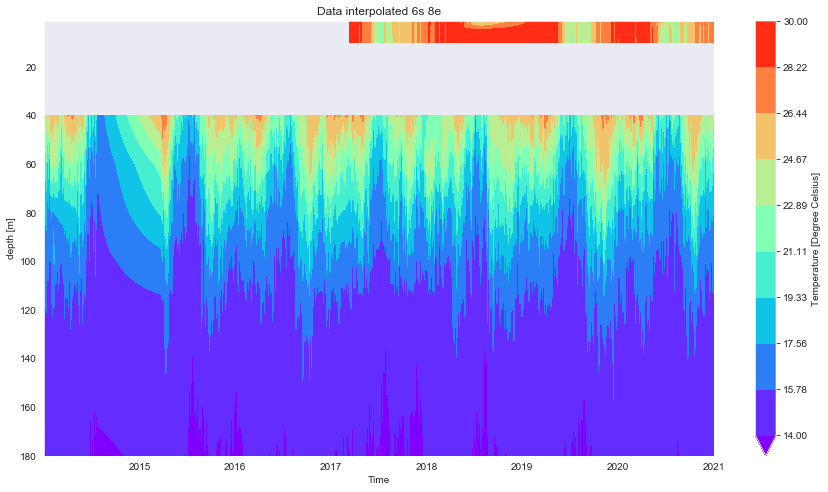

In [25]:
X, Y = np.meshgrid(time,depth_array)
plt.figure(figsize=(15,8))
levels = np.linspace(14.0, 30.0, 10)
cs = plt.contourf(X, Y, T_array, cmap='rainbow', levels=levels, extend ='min')
#cs = plt.contourf(X, Y, T_array, cmap='rainbow', levels=levels, extend ='both')

plt.title('Data interpolated 6s 8e')
plt.gca().invert_yaxis()
cbar = plt.colorbar(cs, label='Temperature [Degree Celsius]')
# cbar.ylabel('# of contacts', rotation=270)
plt.xlabel(f'Time')
plt.ylabel(f'depth [m]')
plt.show()

# Temperatura da boia e argo completas

Use dados de interpolar previamente corrigidos para completar os valores de temperatura da boia, ele procede da mesma maneira. A mesma análise aplicada apenas em um nível, neste caso é aplicada em todos os níveis e os dados são salvos como BuoyArray.
Nesta parte do código, algumas condições são adicionadas pois nem todos os níveis de dados da boia estão disponíveis. O coeficiente de correlação é colocado no final.

In [30]:
def MergeData2(time,templevel, juld, temperatura, level_buoy):
#     juld = time buoy
#     temperatura temperature buoy
#     level_buoy    
    df_full = pd.DataFrame({ 'time': time, 'temp2': templevel })
    df_full['time'] = df_full['time'].dt.date
    # load in dataframe complete data    
    templeveln = temperatura[:,level_buoy:level_buoy+1]
    templeveln = templeveln.values.reshape(-1)
    juld = juld.values.reshape(-1)
    
    df = pd.DataFrame()
    dfr = pd.DataFrame()
    flagcont = False
    if templeveln.shape[0] != 0:
        df['time'] = juld
        df['time'] = df['time'].dt.date
        df['temp1'] = templeveln
    
        dfr = pd.merge(df, df_full, how="left", on=["time"])        
        dfr = dfr[dfr.temp2.notna()]
        dfr = dfr.reset_index()
        flagcont = True
        
    return dfr, flagcont

#https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2 

def CompleteData2(dfr, degree, temp2Clean):
    
    polyreg1 = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    
    
    x  = dfr.temp2.values
    y = dfr.temp1.values   
    
    x = x[~np.isnan(x)]
    y = y[~np.isnan(x)]
    
    x = x[~np.isnan(y)]
    y = y[~np.isnan(y)]   
    
    
    if len(x)!=0:
        corr_mean = stats.spearmanr(x, y)
        print("Correlation Coef: ", corr_mean[0])
        
    polr = polyreg1.fit(x.reshape(-1,1), y.reshape(-1,1))
    
    temp2Clean = temp2Clean[~np.isnan(temp2Clean)]
    
    BuoyCompData = (polr.predict(temp2Clean.reshape(-1, 1) ))
    
    return BuoyCompData


BuoyArray = np.zeros([depth_t.shape[0],time.shape[0] ])
degree = 1
for n, level_buoy in enumerate(depth_t):
    # loop over deth values   
    print("level buoy", level_buoy.values)
    dfr, flagcont = MergeData2(time,T_array[n,:], juld, temperatura, int(level_buoy.values))
        
    if flagcont and len(dfr)!=0:
#         print("Interpolate data")
        BuoyCompData = CompleteData2(dfr, degree, T_array[n,:])
        if BuoyCompData.shape[0]==time.shape[0]:
            BuoyArray[n,:] = BuoyCompData.reshape(-1)

level buoy 1.0
Correlation Coef:  0.9541524104759403
level buoy 5.0
Correlation Coef:  0.09194358892631325
level buoy 10.0
Correlation Coef:  -0.10037308224302677
level buoy 13.0
level buoy 23.0
level buoy 30.0
level buoy 40.0
Correlation Coef:  0.3127734550666212
level buoy 60.0
Correlation Coef:  0.06883316854727622
level buoy 80.0
Correlation Coef:  0.06536973515414357
level buoy 100.0
Correlation Coef:  0.27028715283406723
level buoy 120.0
Correlation Coef:  0.36875033632328524
level buoy 140.0
Correlation Coef:  0.3029316071340695
level buoy 180.0
Correlation Coef:  -0.2144948686096321


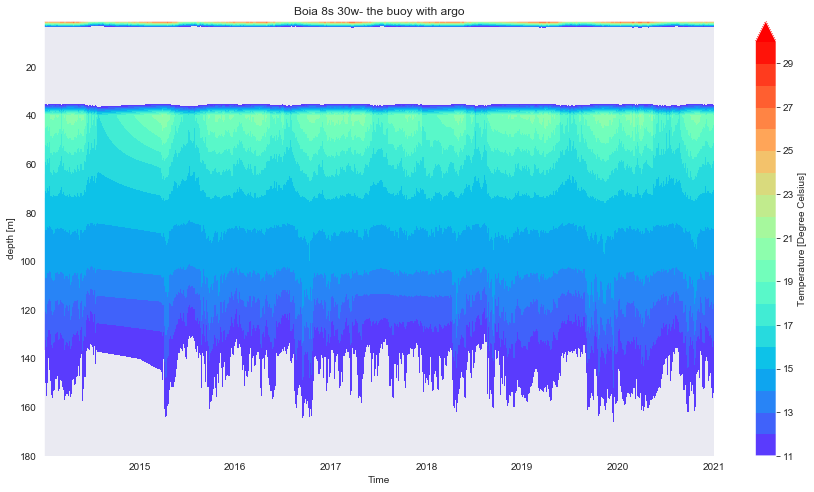

In [31]:
X, Y = np.meshgrid(time,depth_array)
#Z = BuoyArray
Z = BuoyArray
plt.figure(figsize=(15,8))
levels = np.linspace(11.0, 30.0, 20)
# fig1, ax2 = plt.subplots(constrained_layout=True)
cs = plt.contourf(X, Y, Z, cmap='rainbow', levels=levels, vmax=30, vmin = 10,extend ='max')
#cs = plt.contourf(X, Y, T_array, cmap='rainbow', levels=levels)

plt.title('Boia 8s 30w- the buoy with argo')
plt.gca().invert_yaxis()
cbar = plt.colorbar(cs, label='Temperature [Degree Celsius]')
#cbar.ylabel('# of contacts', rotation=270)
plt.xlabel(f'Time')
plt.ylabel(f'depth [m]')
plt.show()

1) Limpei os dados e tive os dias em que ambas as temperaturas estão disponíveis.
2) Tomando apenas os dias em que ambos os sinais estão presentes, a correlação entre eles é calculada.
3) A interpolação é usada para completar os pontos de dados que são mais completos.
4) Usando os dados com valores ausentes, procedemos à reconstrução dos dados que estão muito incompletos.
Para fazer isso, uma aproximação polinomial de grau 10 foi usada. 
(Nos casos em que há poucos dados, a aproximação é realizada, mas com resultados de qualidade inferior).
Na última etapa de gerar a interpolação das temperaturas da bóia,
para as diferentes profundidades ambas as temperaturas estão relacionadas à mesma profundidade 
(a correlação não é alta em todos os casos). Em algumas profundidades, nenhum valor é mostrado, 
isso porque os dados estão muito incompletos e não há como reconstruí-los.